In [ ]:
!pip install geopandas
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 25.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rio
import warnings
%matplotlib inline

import numpy as npy
from osgeo import gdal

In [ ]:
vectores = pd.DataFrame()

for y in range(13, 23, 1):
    print(y)
    dem = gdal.Open(f"/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_20{str(y)}.tif")
    #dem     = gdal.Open(f"/content/drive/MyDrive/Entregas/NDVI_20{str(y)}.tif")
    raster  = dem.GetRasterBand(1)
    aspecto = raster.ReadAsArray()
    vector  = aspecto.ravel()
    vectores[f"20{str(y)}"] = vector


13
14
15
16
17
18
19
20
21
22


In [ ]:
vectores_new = pd.DataFrame()
for col in vectores.columns:
    vectores_new[col] = vectores[col].dropna()
vectores_new = vectores_new[:351]

In [ ]:
ideam = pd.read_csv("/content/drive/MyDrive/analisis geoespacial/Entregas/excel.csv.csv", ',', usecols=['NombreEstacion', 'Fecha', 'Valor'])

estaciones = ideam['NombreEstacion'].unique()
estaciones_q = pd.DataFrame()
for i in range(1, len(estaciones)-1):
    estaciones_q[f"{ estaciones[i]}"] = ideam[ideam['NombreEstacion']== estaciones[i]].iloc[:351]['Valor'].values

In [ ]:
estaciones_q

,COLTEPUNTO RNS 19 [23087260],MASCOTA LA [23107030],PAILANIA [23087200],PENAS BLANCAS [23167010],SAN MIGUEL - AUT [23057140],SONSON [26187030]
0,1.569000,6.800,39.89,1130.000000,242.8,2.393
1,1.420000,6.520,23.35,1369.000000,192.5,2.472
2,1.295000,6.470,35.12,1485.000000,184.5,2.293
3,1.812000,8.100,38.59,2354.000000,231.8,2.633
4,2.671000,9.570,32.72,3043.000000,223.7,2.874
...,...,...,...,...,...,...
346,2.528906,7.475,30.71,3379.909339,344.0,6.548
347,2.422194,5.258,22.51,3494.766029,317.9,5.641
348,2.325049,4.869,17.56,3452.142440,292.8,5.401
349,4.089797,6.043,18.05,3025.087198,300.6,3.160


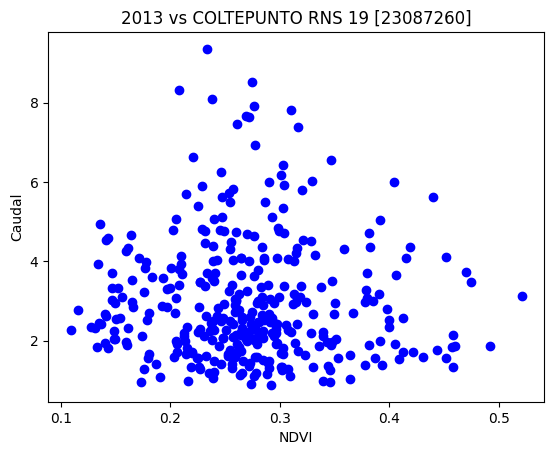

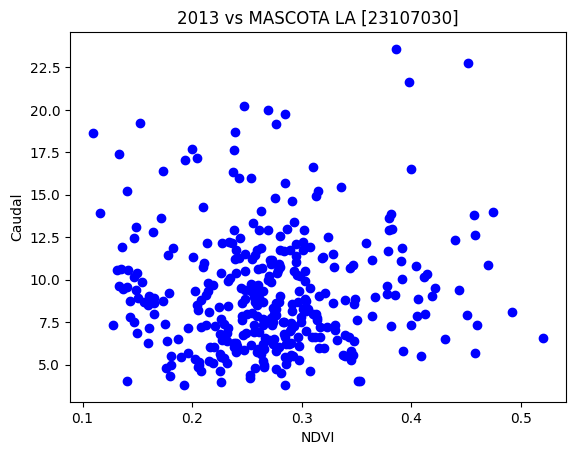

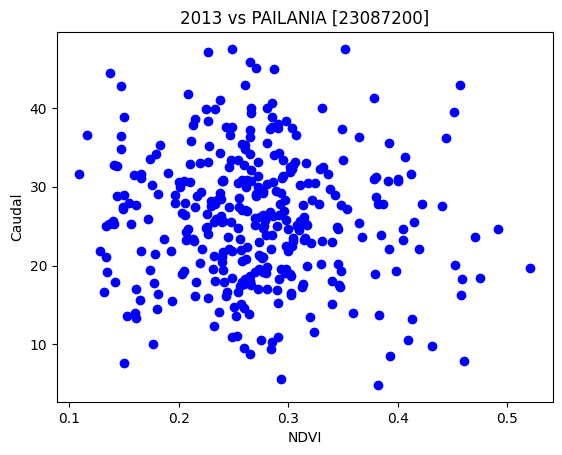

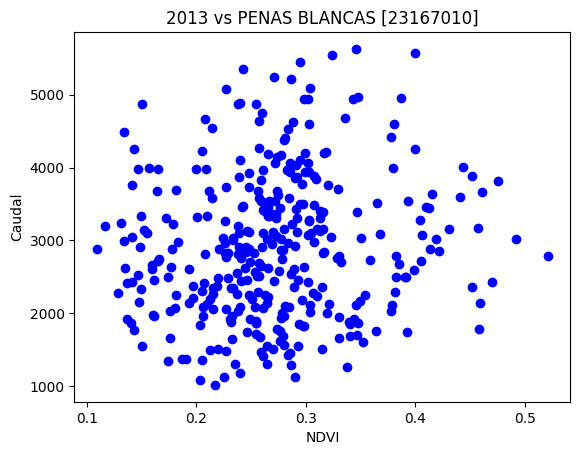

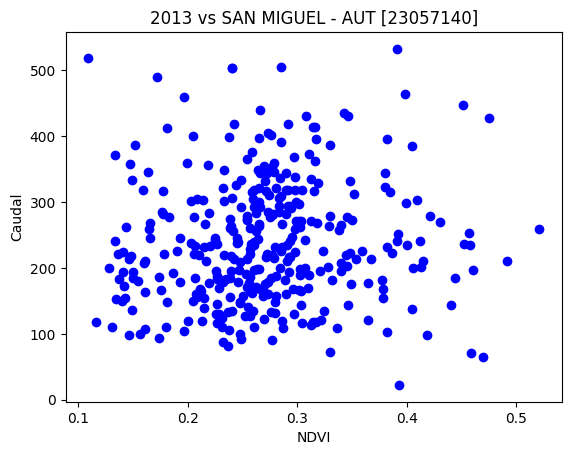

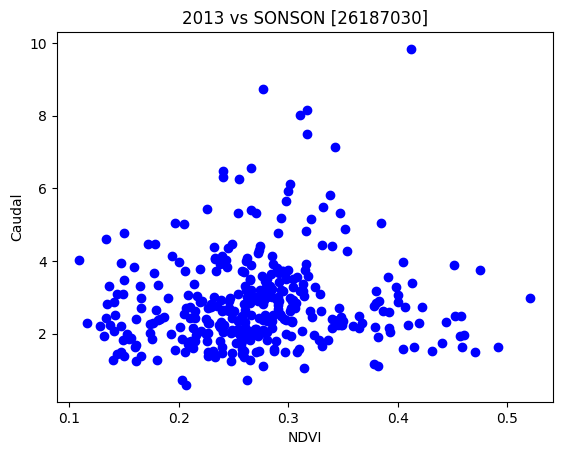

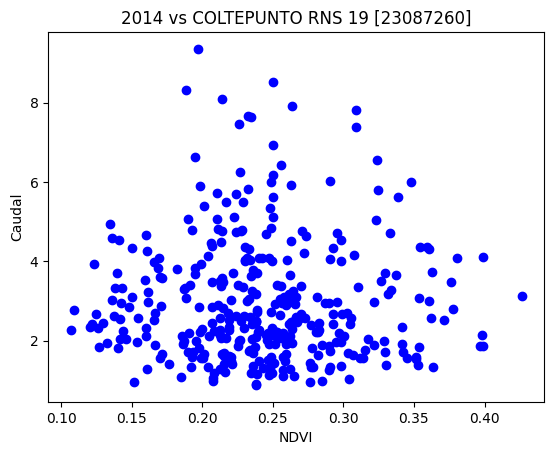

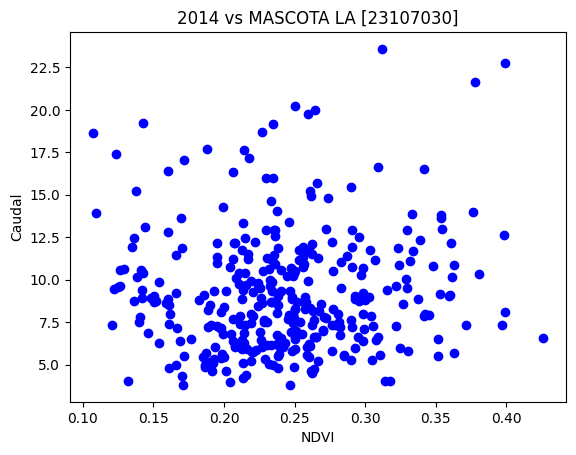

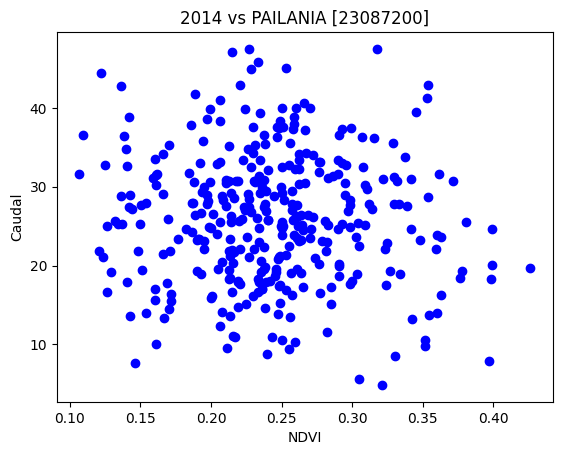

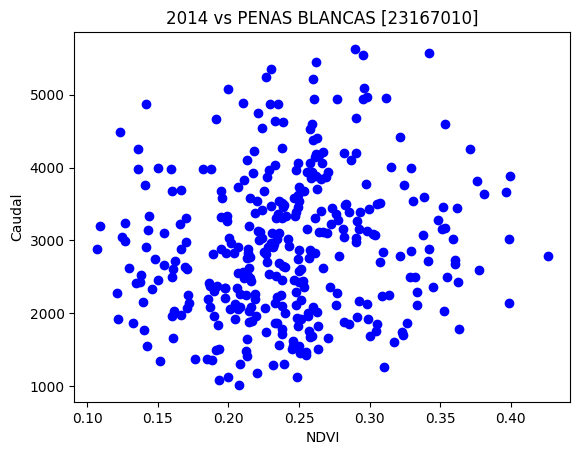

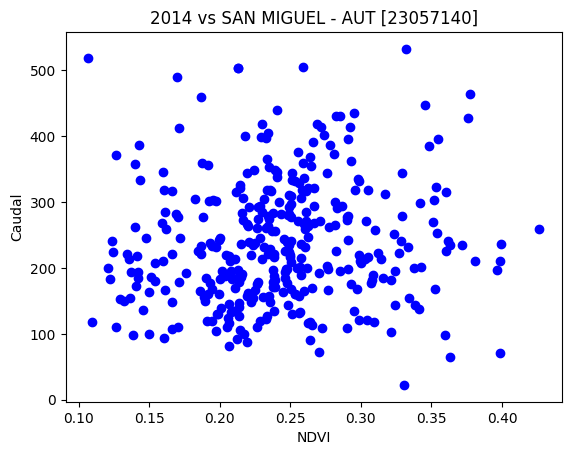

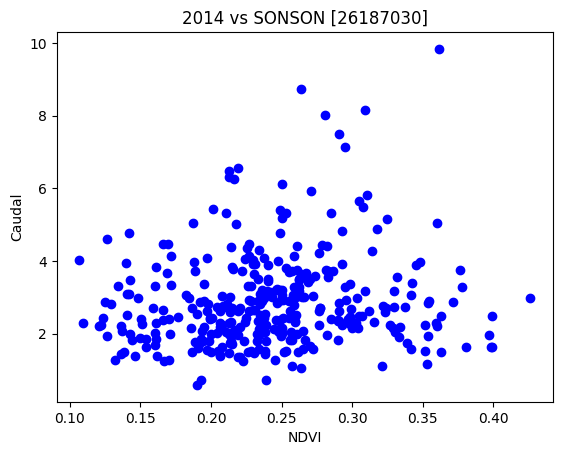

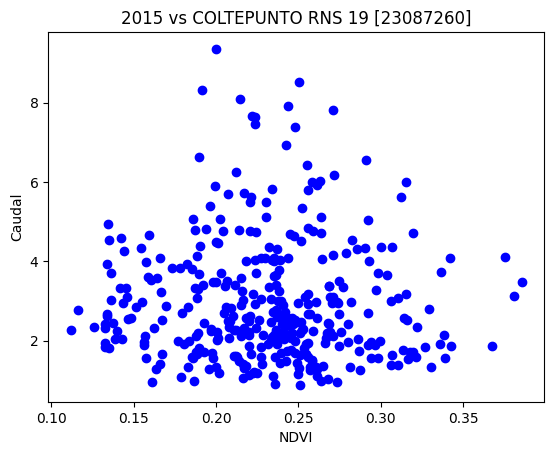

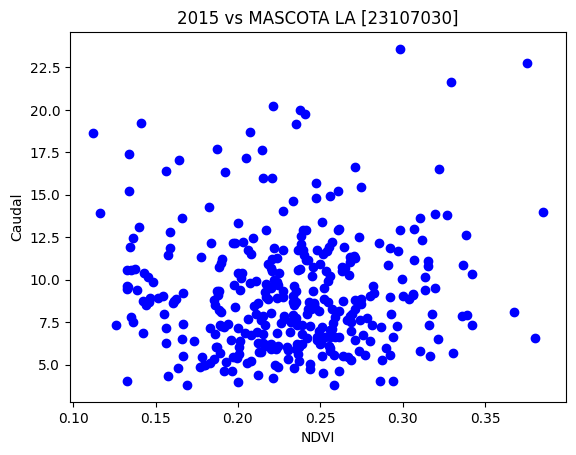

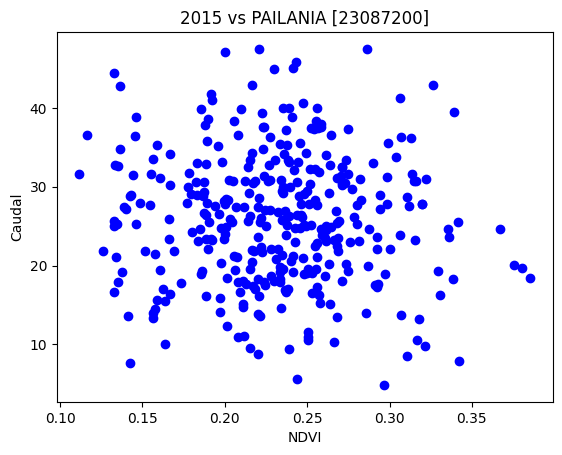

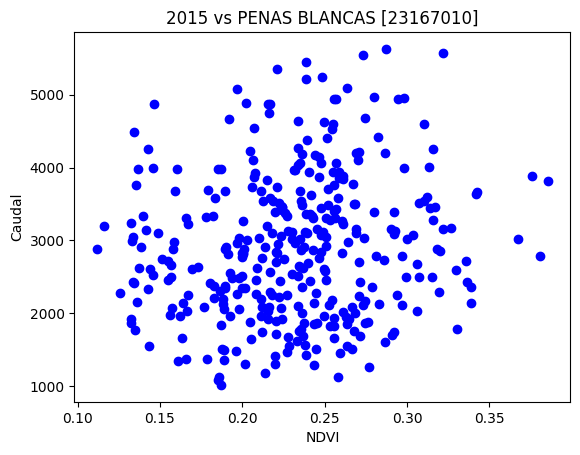

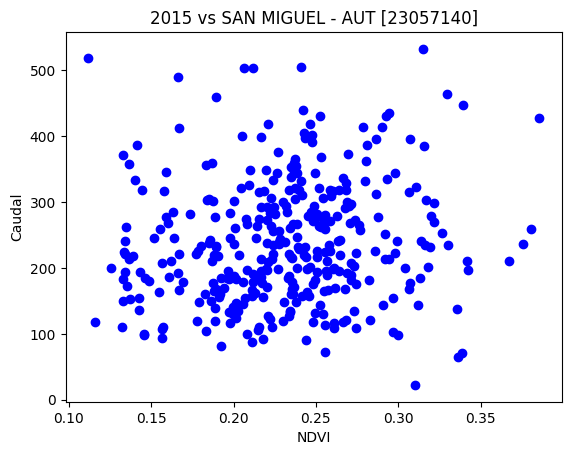

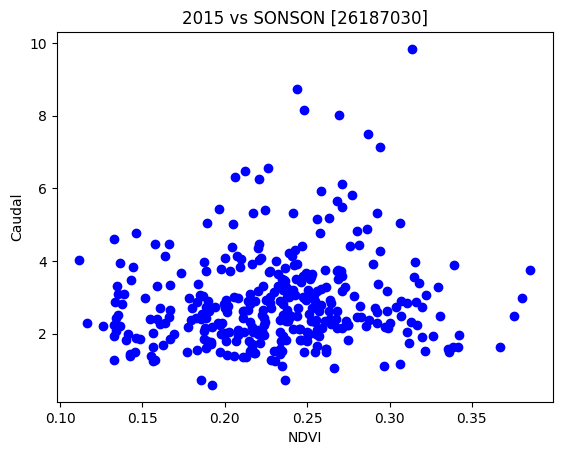

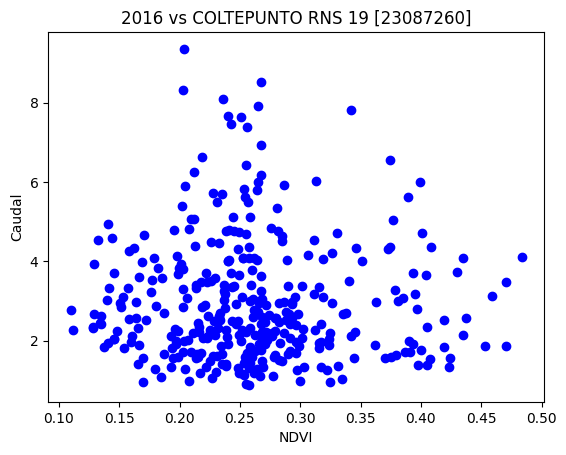

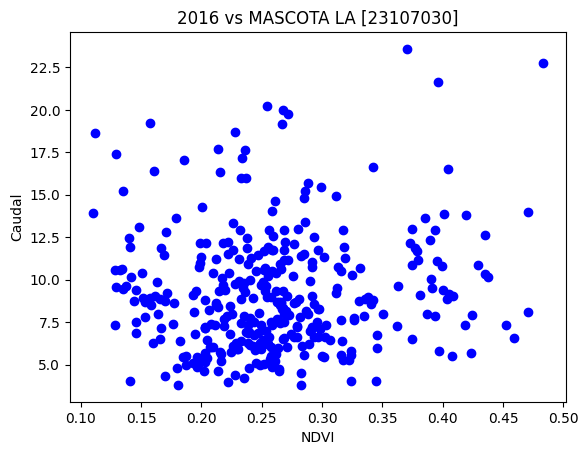

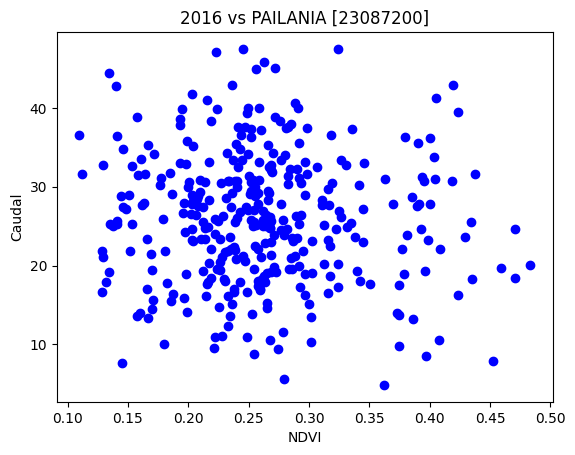

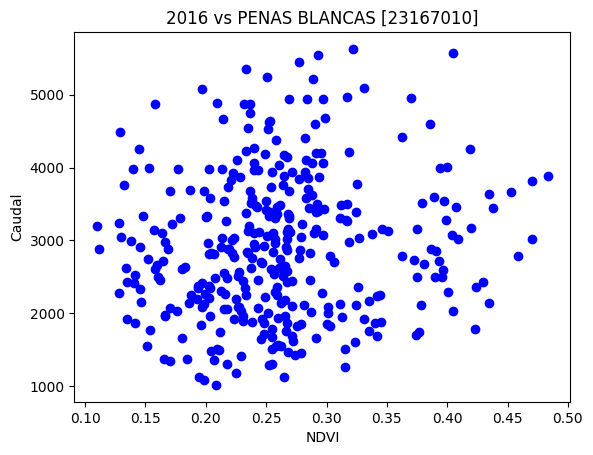

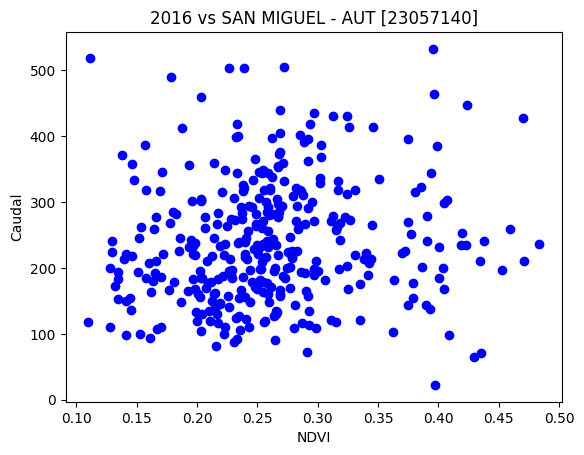

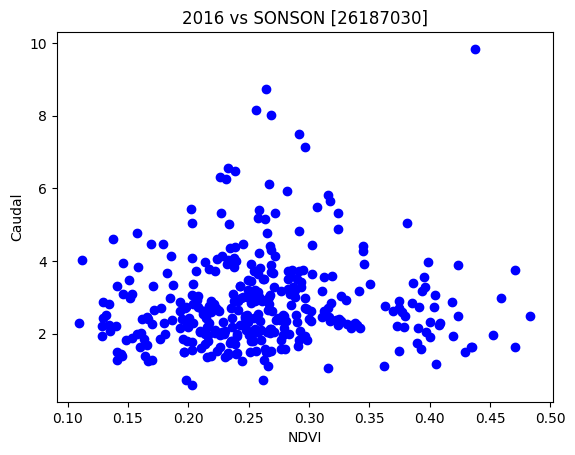

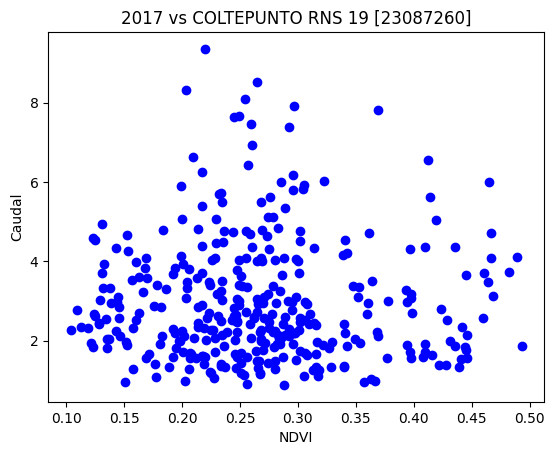

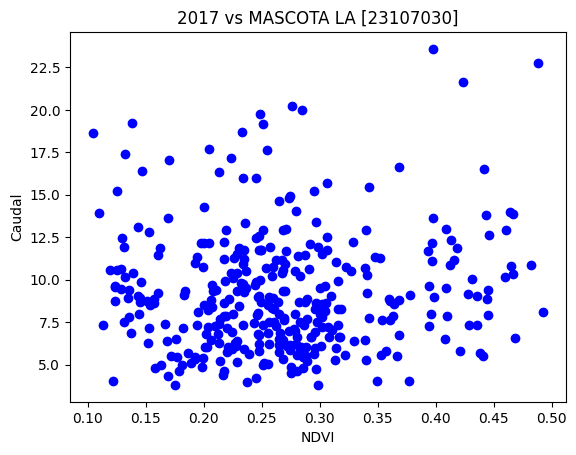

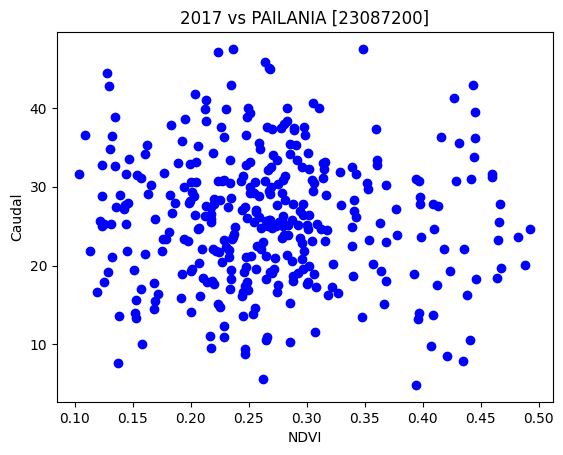

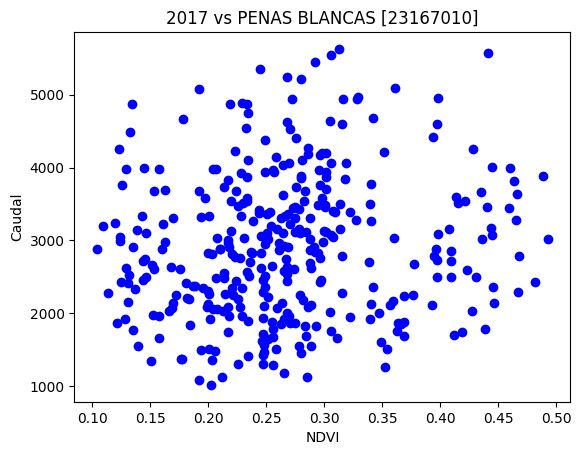

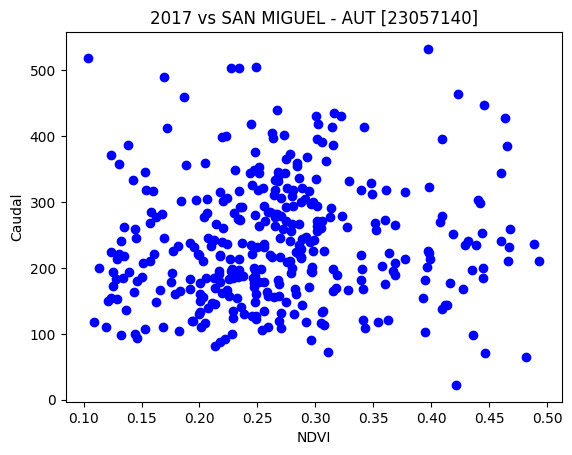

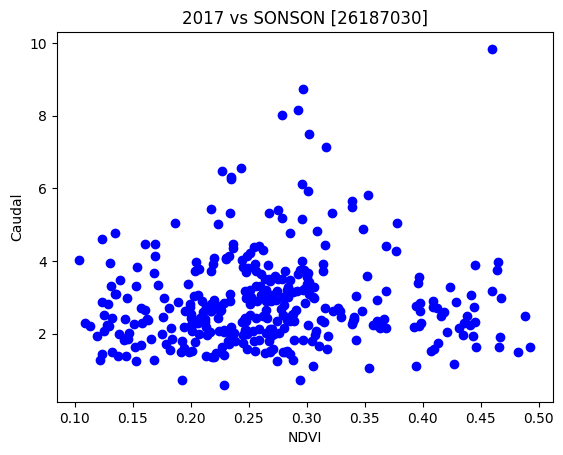

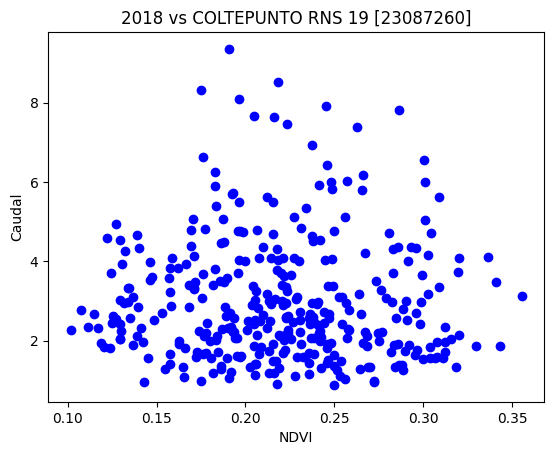

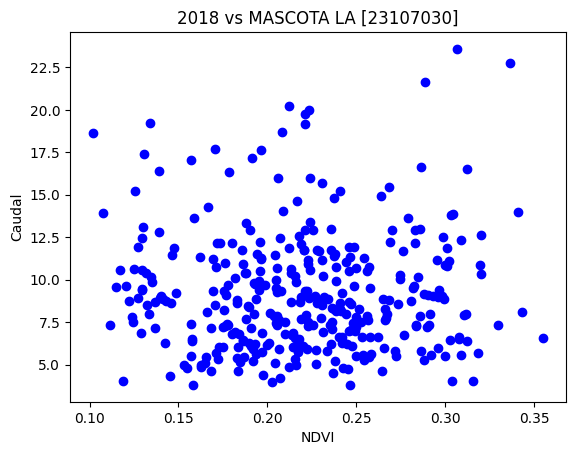

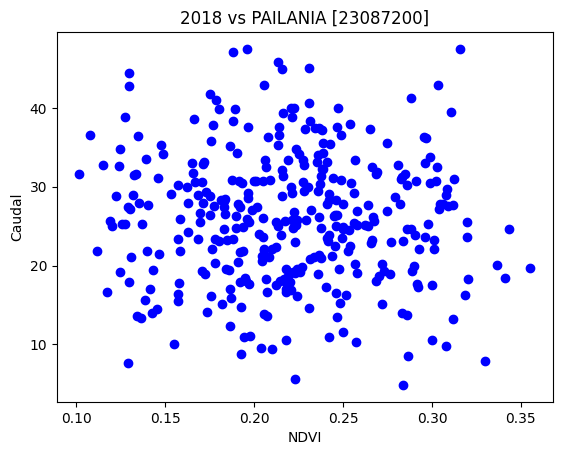

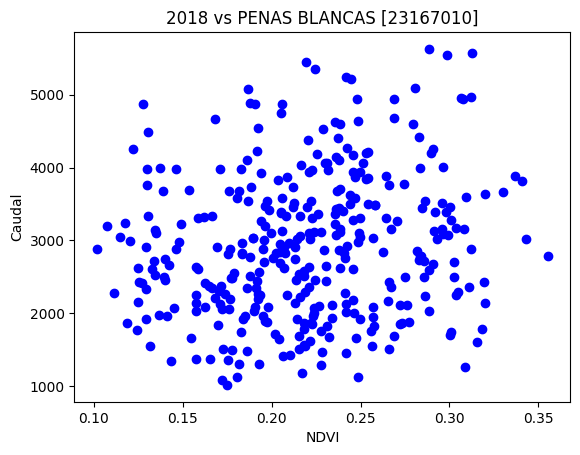

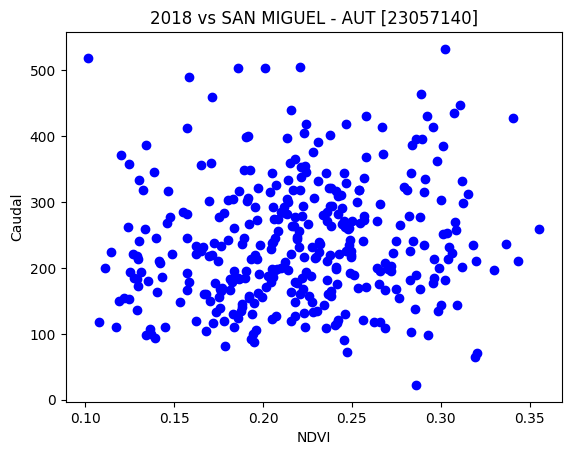

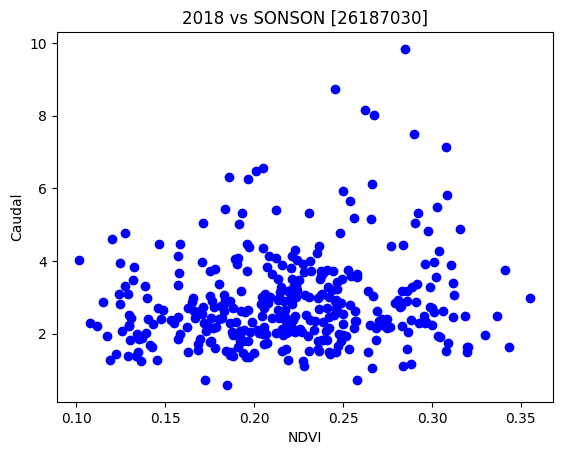

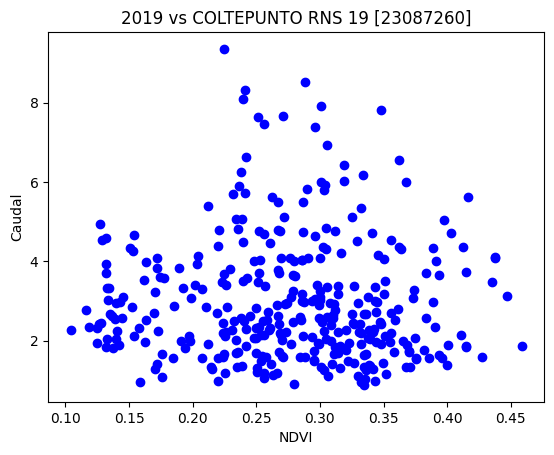

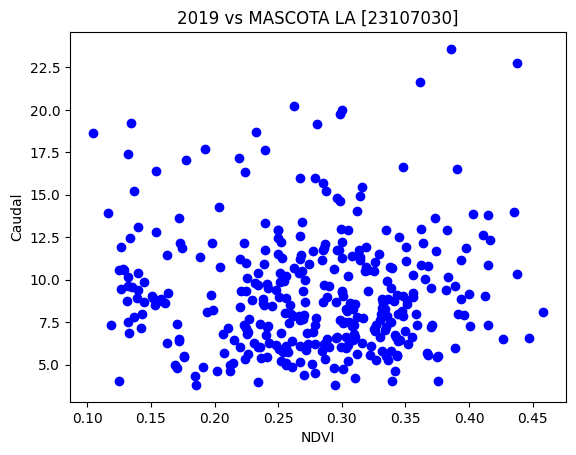

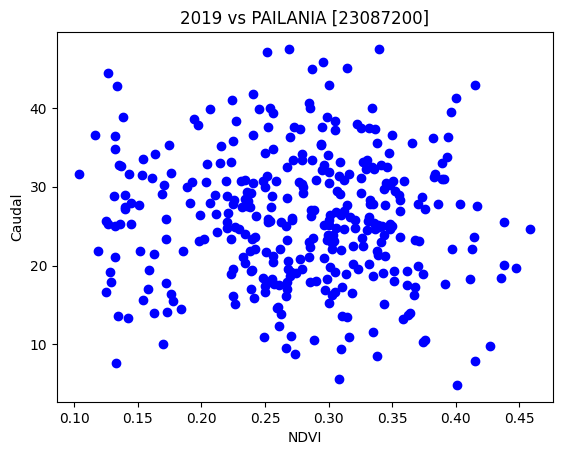

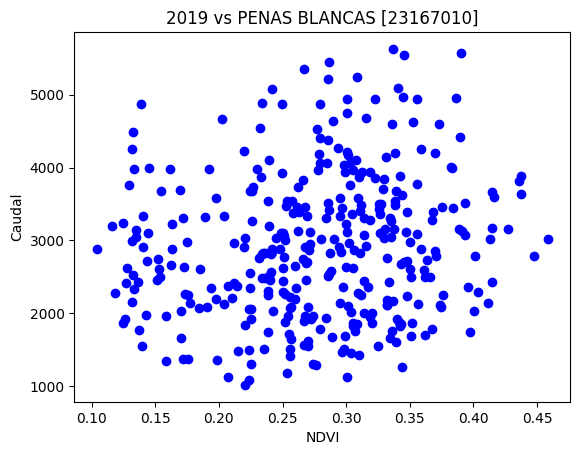

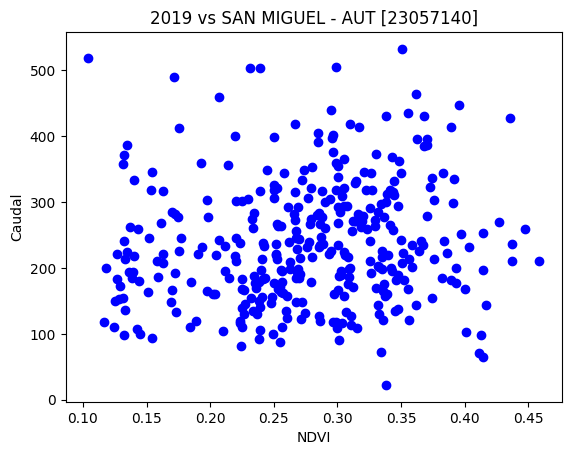

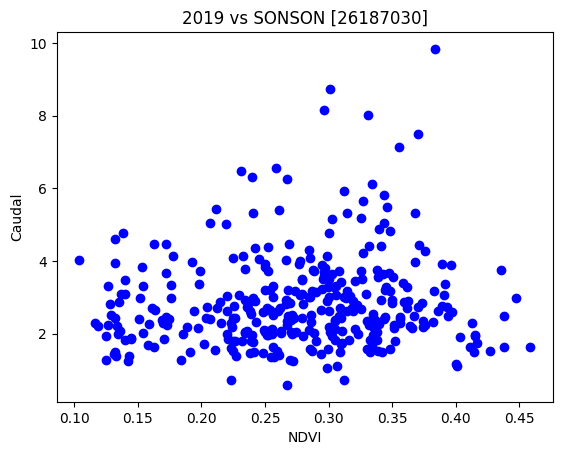

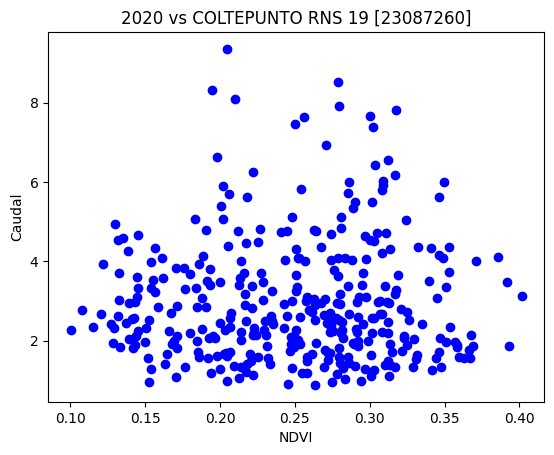

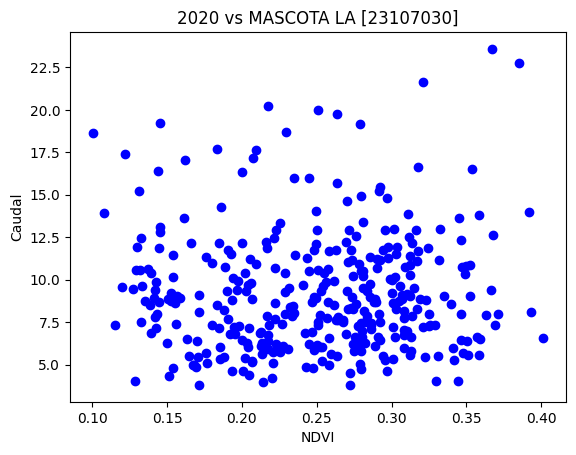

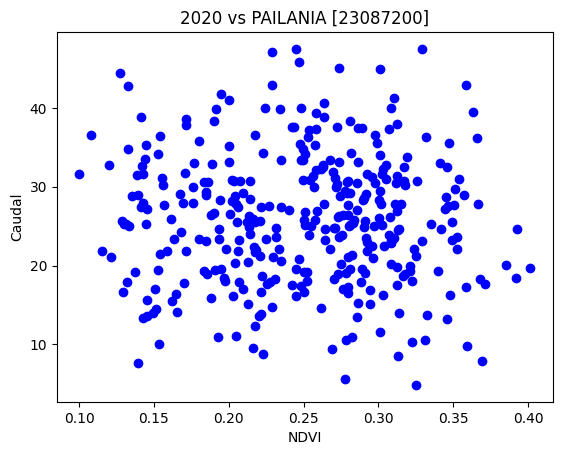

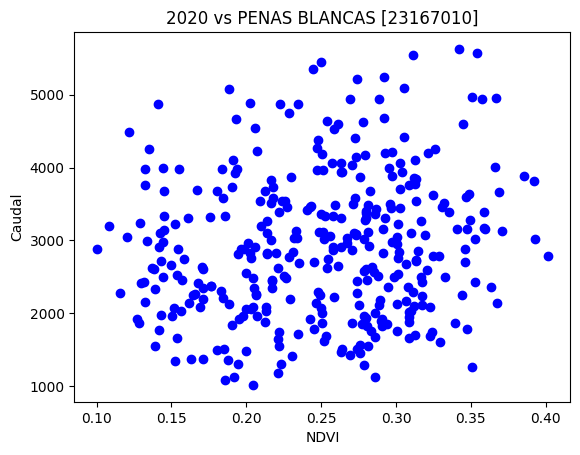

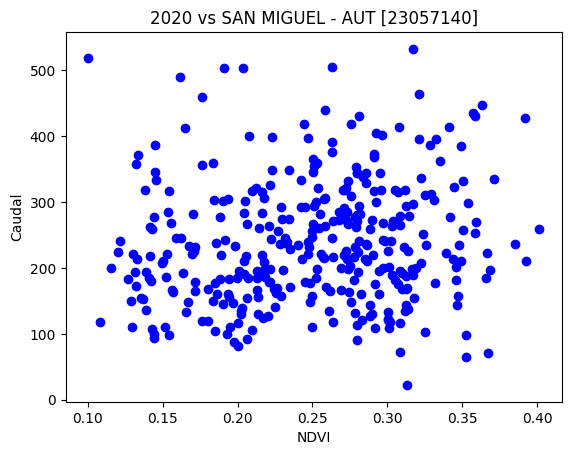

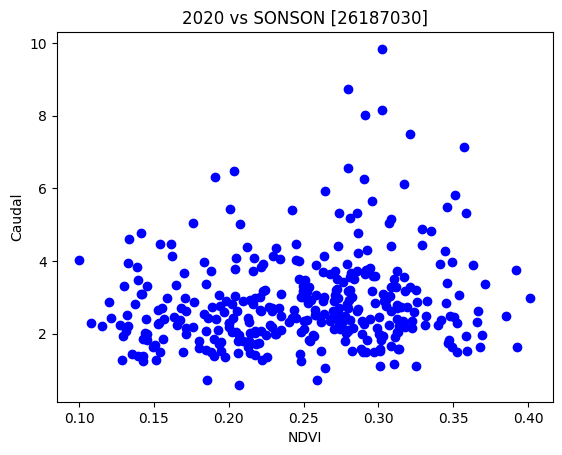

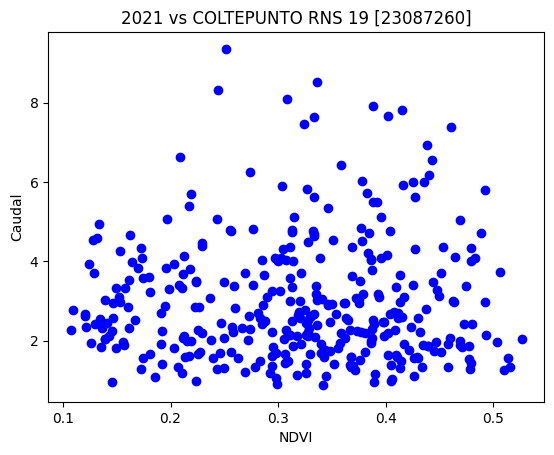

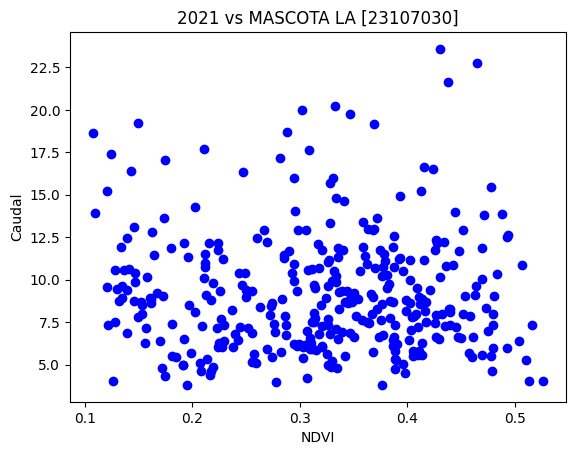

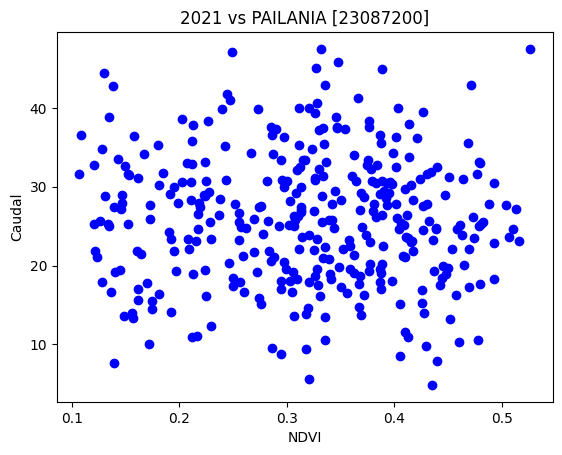

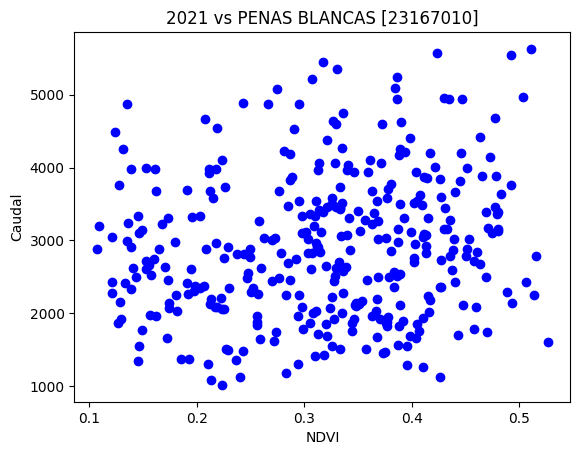

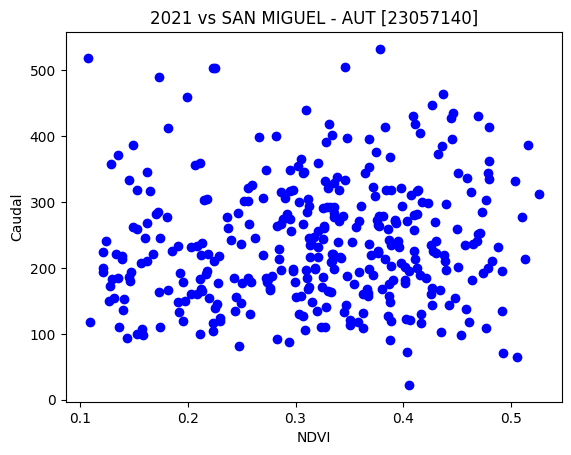

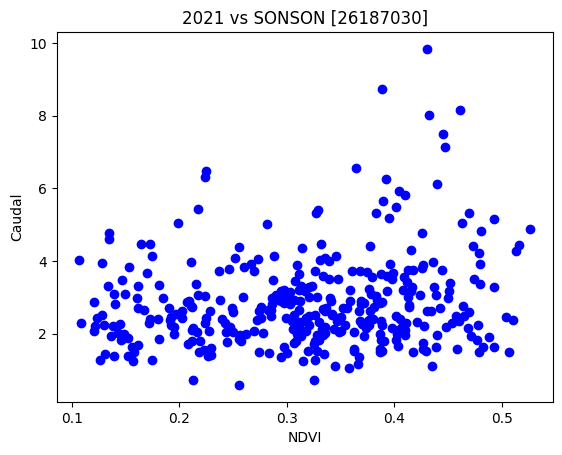

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(2013, 2022):
    for j in range(1, len(estaciones)-1):
        est = estaciones_q[f"{estaciones[j]}"]
        v = vectores_new[str(i)]

        plt.scatter(v, est, c = 'b')
        plt.title(f"{str(i)} vs {estaciones[j]}")
        plt.xlabel('NDVI')
        plt.ylabel('Caudal')
        plt.show()
        plt.savefig(f"{str(i)} vs {estaciones[j]}.png",  bbox_inches='tight')

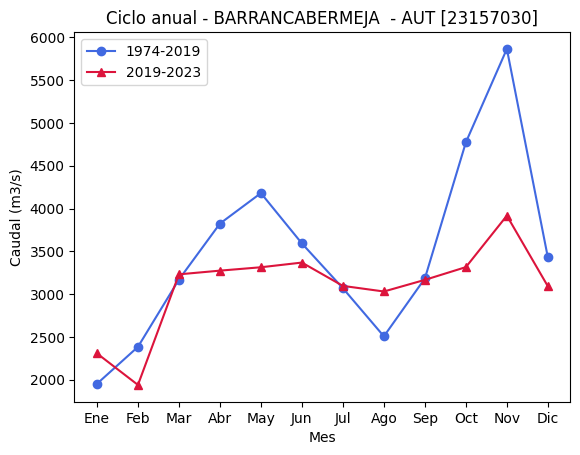

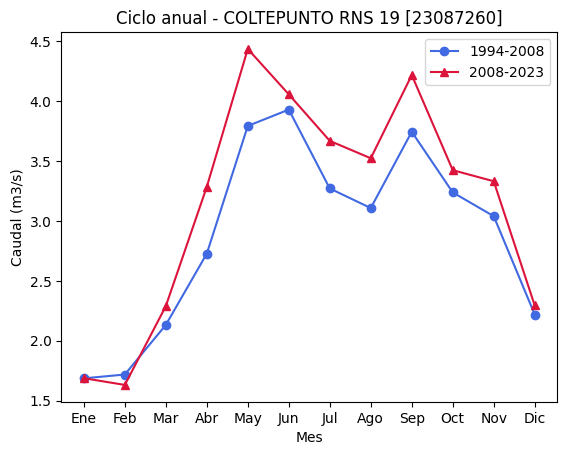

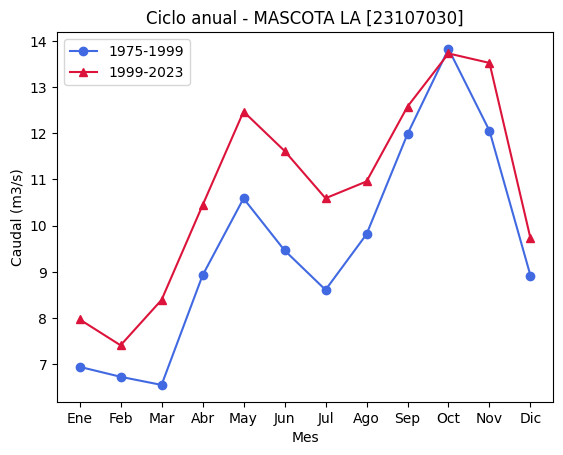

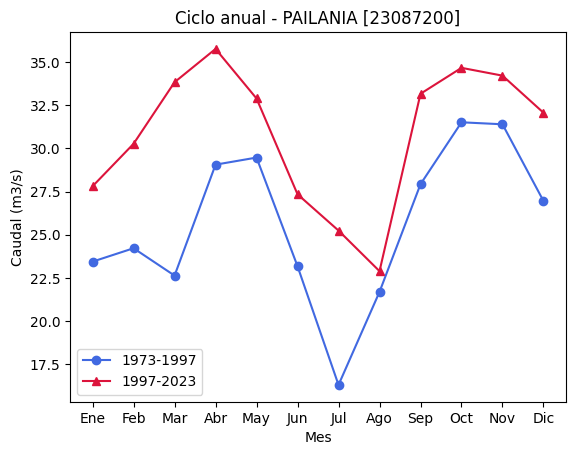

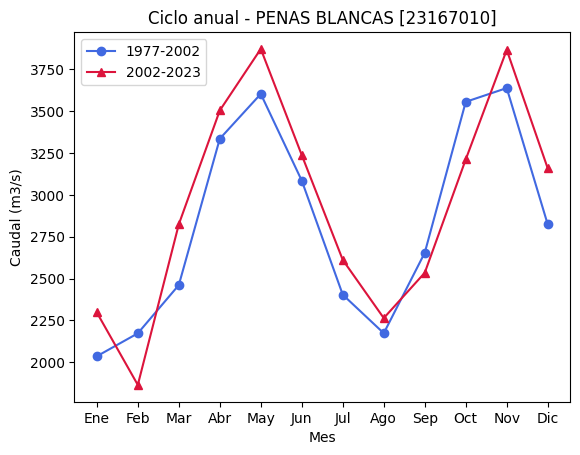

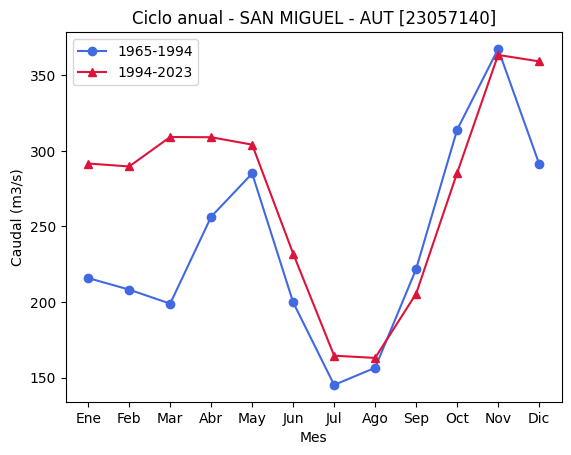

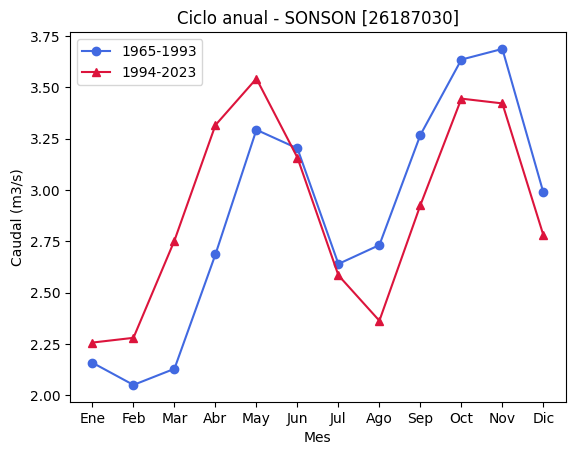

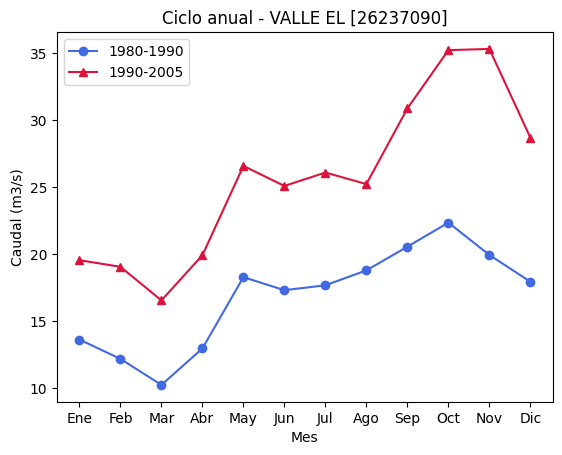

In [ ]:
df_dict = {}
for i, estacion in enumerate(ideam['NombreEstacion'].unique()):
    val   = ideam[ideam['NombreEstacion']== estaciones[i]]['Valor'].values
    fecha = ideam[ideam['NombreEstacion']== estaciones[i]]['Fecha'].values
    df_dict[estacion] = {'fecha': fecha, 'val': val}
    df = pd.DataFrame.from_dict(df_dict[estacion], orient='columns')
    mitad_1 = df[:int(np.round(len(df['val'])/2))]
    mitad_1['fecha'] = pd.to_datetime(mitad_1['fecha'])
    mitad_1.set_index('fecha', inplace=True)
    mitad_2 = df[int(np.round(len(df['val'])/2)):]
    mitad_2['fecha'] = pd.to_datetime(mitad_2['fecha'])
    mitad_2.set_index('fecha', inplace=True)

    ciclo_anual_1 = mitad_1.groupby(mitad_1.index.month)['val'].mean()
    ciclo_anual_2 = mitad_2.groupby(mitad_2.index.month)['val'].mean()
    # Crear una figura y un eje
    fig, ax = plt.subplots()

    # Trazar el ciclo anual
    ca_1 = ax.plot(ciclo_anual_1.index, ciclo_anual_1.values, marker='o', c = 'royalblue', label=f'{str(mitad_1.index[0])[:4]}-{str(mitad_1.index[-1])[:4]}')
    ca_2 = ax.plot(ciclo_anual_2.index, ciclo_anual_2.values, marker='^', c = 'crimson', label=f'{str(mitad_2.index[0])[:4]}-{str(mitad_2.index[-1])[:4]}')

    # Configurar las etiquetas del eje x
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    ax.set_title(f"Ciclo anual - {estacion}")

    ax.set_xlabel('Mes')
    ax.set_ylabel('Caudal (m3/s)')
    ax.legend()

    plt.savefig(f"Ciclo anual - {estacion}", bbox_inches='tight')

In [ ]:
str(mitad_1.index[0])[:4]

'1980'

In [ ]:
mitad_1

,val
fecha,
1980-06-01,17.00
1980-07-01,14.70
1980-08-01,16.30
1980-09-01,20.00
1980-10-01,21.60
...,...
1990-07-01,19.44
1990-08-01,15.00
1990-09-01,14.32
